In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import re
import numpy as np
from datetime import datetime
from datetime import date

In [95]:
# Set default plot stype for matplotlib
plt.style.use('ggplot')

# Set default figure size for matplotlib
plt.rcParams['figure.figsize'] = (12, 6)

In [19]:
# Connect to untap database (using sqlite3), found here: 
# https://workbench.su92l.arvadosapi.com/projects/su92l-j7d0g-k6xjjk9g0l5pmqh#Data_collections

conn = sqlite3.connect('Database/untap.db')
c = conn.cursor()
c.execute('SELECT * FROM demographics')
rows = c.fetchall()
demographics = pd.DataFrame(rows,columns=zip(*c.description)[0])

conn.close()

In [20]:
# Doing some basic data munging to clean up birthdate data

# convert date to all lower case and strip out blank spaces for height and weight
demographics.date_of_birth = demographics.date_of_birth.str.strip()

# remove characters with parantheses, replace empties with NaNs and convert to datetimes
g = lambda x:re.sub('\s\([^)]*\)','',x)   
birthdate = demographics.date_of_birth.apply(g)

demographics['only_birth'] = demographics.date_of_birth.apply(g)

demographics.only_birth = demographics['only_birth'].replace(r'\s+|^$', np.nan, regex=True)
demographics.only_birth = pd.to_datetime(demographics.only_birth,format='%Y-%m-%d')

# calculate current age
ageSec = date.today()-demographics.only_birth
demographics['only_age'] = ageSec/np.timedelta64(365,'D')

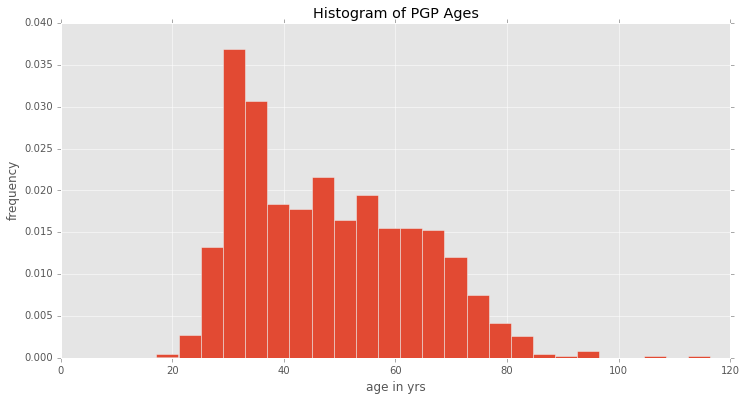

In [96]:
# Plotting a histogram of ages 

# find null values
idx = demographics.only_age.notnull()

# create the histogram (excluding null values)
plt.hist(demographics.only_age[idx],25,normed=True)

plt.title("Histogram of PGP Ages")
plt.xlabel("age in yrs")
plt.ylabel("frequency")
plt.savefig('Images/histogramAges.png',format='png',dpi=300)  


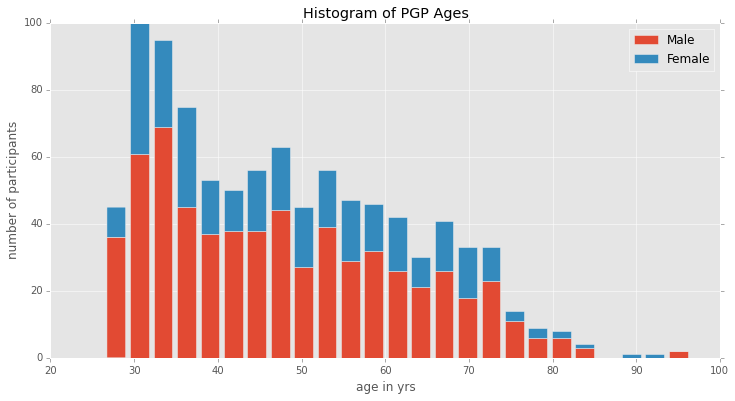

In [97]:
# Stack histograms for male and female participants

idxM = (demographics.gender == 'Male') & idx 
idxF = (demographics.gender == 'Female') & idx

plt.hist([demographics.only_age[idxM], demographics.only_age[idxF]],25, stacked=True)

plt.title("Histogram of PGP Ages")
plt.xlabel("age in yrs")
plt.ylabel("number of participants")
plt.legend(['Male','Female'])

plt.savefig('Images/histogramAges.png',format='png',dpi=300)

In [98]:
# Data munging for weight data

# strip off any spaces/banks at beginning or end
demographics.weight = demographics.weight.str.strip()

# extract weight (in kg) 
g2 = lambda x:x[x.find("(")+1:x.find("k")]
only_weight = demographics.weight.apply(g2)

demographics['only_weight'] = only_weight

# replace empties (spaces) with NaNs
demographics.only_weight = demographics['only_weight'].replace(r'\s+|^$', np.nan, regex=True)
demographics.only_weight

# convert from strings to floats
demographics['only_weight'] = demographics.only_weight.astype(float)


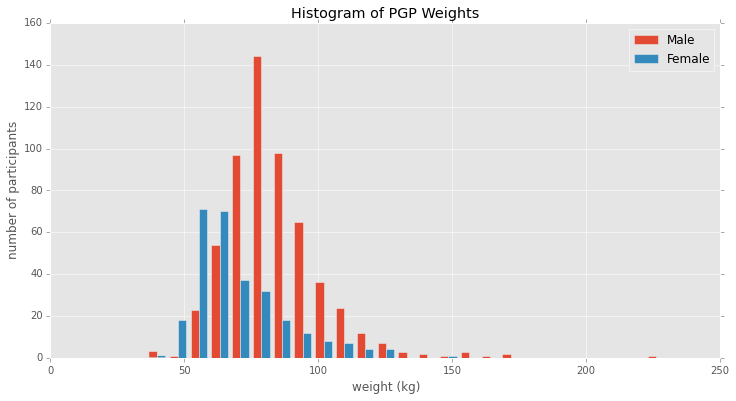

In [100]:
# create the histogram

idx = demographics.only_weight.notnull()
idxM = (demographics.gender == 'Male') & idx 
idxF = (demographics.gender == 'Female') & idx

plt.hist([demographics.only_weight[idxM], demographics.only_weight[idxF]], 25)

plt.title("Histogram of PGP Weights")
plt.xlabel("weight (kg)")
plt.ylabel("number of participants")
plt.legend(['Male','Female'])

plt.savefig('Images/histogramWeights.png',format='png',dpi=300)

In [101]:
# Data munging for height data

# strip off any spaces/banks at beginning or end
demographics.height = demographics.height.str.strip()

# extract height (in kg) 
g2 = lambda x:x[x.find("(")+1:x.find("k")]
only_height = demographics.weight.apply(g2)

demographics['only_height'] = only_height

# replace empties (spaces) with NaNs
demographics.only_height = demographics['only_height'].replace(r'\s+|^$', np.nan, regex=True)

# convert from strings to floats
demographics['only_height'] = demographics.only_height.astype(float)

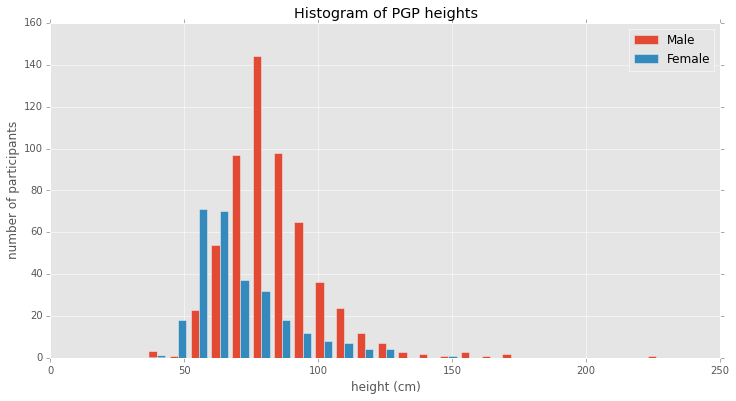

In [102]:
# create the histogram

idx = demographics.only_height.notnull()
idxM = (demographics.gender == 'Male') & idx 
idxF = (demographics.gender == 'Female') & idx

plt.hist([demographics.only_height[idxM], demographics.only_height[idxF]], 25)

plt.title("Histogram of PGP heights")
plt.xlabel("height (cm)")
plt.ylabel("number of participants")
plt.legend(['Male','Female'])

plt.savefig('Images/histogramHeights.png',format='png',dpi=300)